<a href="https://colab.research.google.com/github/KatiaKudinova/Global-Sales-Analytics/blob/main/Global%20Sales%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df1_path = '/content/drive/MyDrive/DA Python/countries.csv'
df2_path = '/content/drive/MyDrive/DA Python/products.csv'
df3_path = '/content/drive/MyDrive/DA Python/events.csv'
df1 = pd.read_csv(df1_path)
df2 = pd.read_csv(df2_path)
df3 = pd.read_csv(df3_path)
print(df1.head())
print(df2.head())
print(df3.head())

# df3.merge(df2, left_on='Product ID', right_on='id', how='left')
# df = df1.merge(df3, left_on='alpha-3', right_on='Country Code', how='left')
# print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia
     id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017          

Для об'єднання df2 (products) та df3 (events):

df2 має поле id, а df3 має поле Product ID.
 Ці два поля є ключами для об'єднання, оскільки вони представляють ідентифікатор продукту, дозволяючи зв'язати деталі про товар (з df2) з інформацією про продажі (з df3).

**Пошук і видалення пропущених даних:**

In [ ]:
missing_counts = df1.isnull().sum()
missing_percent = (missing_counts / len(df1)) * 100
print(f"Пропущено, шт, {missing_counts}: Пропущено, %, {missing_percent}")
df1_cleaned = df1.dropna().copy()
missing_counts1 = df1_cleaned.isnull().sum()
missing_percent1 = (missing_counts1 / len(df1_cleaned)) * 100
print(f"Пропущено, шт, {missing_counts1}: Пропущено, %, {missing_percent1}")

Пропущено, шт, name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64: Пропущено, %, name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64
Пропущено, шт, name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64: Пропущено, %, name          0.0
alpha-2       0.0
alpha-3       0.0
region        0.0
sub-region    0.0
dtype: float64


**df1 (countries)**

У датафреймі df1 є пропущені значення, що вказує на неповні дані. Колонки з пропусками: alpha-2, region, sub-region мають по 1 пропущеному значенню в кожній. Частка пропусків: приблизно 0.40% від загальної кількості рядків.
 Швидше за все, дані для однієї з країн були неповними. Можливо, при створенні набору даних для однієї країни не було доступної інформації про її 2-літерний код, регіон та субрегіон, або дані були випадково пропущені.
Цей рядок можна просто видалити.


In [ ]:
missing_counts = df2.isnull().sum()
missing_percent = (missing_counts / len(df2)) * 100
print(f"Пропущено, шт, {missing_counts}: Пропущено, %, {missing_percent}")


Пропущено, шт, id           0
item_type    0
dtype: int64: Пропущено, %, id           0.0
item_type    0.0
dtype: float64


**df2 (products)**

У датафреймі df2 пропущених значень немає. Ця таблиця є повною.

In [ ]:
missing_counts = df3.isnull().sum()

missing_percent = (missing_counts / len(df3)) * 100

print(f"Пропущено, шт, {missing_counts}: Пропущено, %, {missing_percent}")


df3['Revenue'] = df3['Units Sold'] * df3['Unit Price']
df3['Profit'] = df3['Units Sold'] * (df3['Unit Price'] - df3['Unit Cost'])

total_revenue = df3['Revenue'].sum()
total_profit = df3['Profit'].sum()
df_nan_country = df3[df3['Country Code'].isna()]
nan_revenue = df_nan_country['Revenue'].sum()
nan_profit = df_nan_country['Profit'].sum()
revenue_share = (nan_revenue / total_revenue) * 100
profit_share = (nan_profit / total_profit) * 100
print(f"Частка доходу з пропущеними країнами: {revenue_share:.2f}%")
print(f"Частка прибутку з пропущеними країнами: {profit_share:.2f}%")

df3_filled = df3.copy()
df3_filled['Country Code'] = df3_filled['Country Code'].fillna('Unknown')
print(df3_filled)

Пропущено, шт, Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64: Пропущено, %, Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64
Частка доходу з пропущеними країнами: 6.06%
Частка прибутку з пропущеними країнами: 5.53%
       Order ID Order Date   Ship Date Order Priority Country Code  \
0     100640618  10/8/2014  10/18/2014              M          NOR   
1     100983083  8/11/2016   8/11/2016              C          SRB   
2     101025998  7/18/2014   8/11/2014              M      Unknown   
3     102230632  5/13/2017   6/13/2017              L          MNE   
4     103435266  8/11/

**Пропущені значення у df3**
Кількість пропущених значень у колонці Country Code - 82, а у Units Sold - 2.
В інших колонках пропуски відсутні.

Частка пропущених значень у колонці Country Code приблизно 6.17% від усіх даних у колонці. Це значна частка адже вона більше ніж 5% і потребує детального аналізу. У колонці Units Sold: Пропуски становлять лише 0.15%. Це дуже мала частка, і видалення цих рядків, не вплине на загальний аналіз.

Після проведення розрахунків видно що, пропущені дані по країнах становлять 6.06% від загального доходу та 5.53% від прибутку. Це означає, що видалення цих рядків призвело б до суттєвої втрати інформації, що сильно вплине на результати аналізу. Тому необхідно замінити пропущені значення на 'Unknown'. Це дозволяє зберегти фінансові дані (дохід, прибуток) і включити їх в загальний аналіз.

In [ ]:
missing_counts = df3_filled.isnull().sum()
missing_percent = (missing_counts / len(df3_filled)) * 100
print(f"Пропущено, шт, {missing_counts}: Пропущено, %, {missing_percent}")
df3_cleaned = df3_filled.dropna().copy()
missing_counts1 = df3_cleaned.isnull().sum()
missing_percent1 = (missing_counts1 / len(df3_cleaned)) * 100
print(f"Пропущено, шт, {missing_counts1}: Пропущено, %, {missing_percent1}")


Пропущено, шт, Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        2
Unit Price        0
Unit Cost         0
Revenue           2
Profit            2
dtype: int64: Пропущено, %, Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      0.000000
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
Revenue           0.150376
Profit            0.150376
dtype: float64
Пропущено, шт, Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
Revenue           0
Profit            0
dtype: int64: Пропущено, %, Order ID          0.0
Order Date        0.0
Ship Date         0.0
Order Priority    0.0
Country

**Перевірка типів даних та їх перетворення:**

In [ ]:
print(df1_cleaned.dtypes)
print(df2.dtypes)
print(df3_cleaned.dtypes)
df3_cleaned['Order Date'] = pd.to_datetime(df3_cleaned['Order Date'], errors='coerce')
df3_cleaned['Ship Date'] = pd.to_datetime(df3_cleaned['Ship Date'], errors='coerce')


name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object
id            int64
item_type    object
dtype: object
Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
Revenue                  float64
Profit                   float64
dtype: object


**Пошук явних дублікатів:**

In [ ]:
duplicates1 = df1_cleaned[df1_cleaned.duplicated()]
duplicates2 = df2[df2.duplicated()]
duplicates3 = df3_cleaned[df3_cleaned.duplicated()]
print(f"Знайдено дублікатів: [{len(duplicates1)}, {len(duplicates2)}, {len(duplicates3)}]")


Знайдено дублікатів: [0, 0, 0]


**Пошук неявних дублікатів та нормалізація даних:**

In [ ]:
def normalize_text(s):
    if isinstance(s, str):
        s = s.strip().lower()
        replacements = {'а': 'a', 'е': 'e', 'о': 'o', 'с': 'c', 'р': 'p', 'х': 'x', 'і': 'i', 'ї': 'i', 'й': 'i'}
        s = ''.join(replacements.get(ch, ch) for ch in s)
        return s
    return s
columns_to_check = ['name', 'alpha-2', 'alpha-3', 'region', 'sub-region',
    'id', 'item_type', 'Order ID', 'Order Date', 'Ship Date',
    'Order Priority', 'Country Code', 'Product ID',
    'Sales Channel', 'Units Sold', 'Unit Price', 'Unit Cost']
dfs = [df1_cleaned, df2, df3_cleaned]
df_names = ['df1_cleaned', 'df2', 'df3_cleaned']
for df, name in zip(dfs, df_names):
    initial_duplicates = df[df.duplicated(keep=False)]
    print(f" {name} — кількість дублікатів ДО нормалізації: {len(initial_duplicates)}")
    if len(initial_duplicates) > 0:
        display(initial_duplicates)
for df in dfs:
    columns_existing = [col for col in columns_to_check if col in df.columns]
    for col in columns_existing:
        df[f'norm_{col}'] = df[col].apply(normalize_text)
for df, name in zip(dfs, df_names):
    columns_existing = [col for col in columns_to_check if col in df.columns]
    normalized_cols = [f'norm_{col}' for col in columns_existing]

    duplicates = df[df.duplicated(subset=normalized_cols, keep=False)]
    print(f"{name} — дублікатів ПІСЛЯ нормалізації: {len(duplicates)}")
    if len(duplicates) > 0:
        display(duplicates)




 df1_cleaned — кількість дублікатів ДО нормалізації: 0
 df2 — кількість дублікатів ДО нормалізації: 0
 df3_cleaned — кількість дублікатів ДО нормалізації: 0
df1_cleaned — дублікатів ПІСЛЯ нормалізації: 0
df2 — дублікатів ПІСЛЯ нормалізації: 0
df3_cleaned — дублікатів ПІСЛЯ нормалізації: 0


**Видалення колонок після нормалізації:**

In [ ]:
for df in dfs:
    cols_to_drop = [col for col in df.columns if col.startswith('norm_')]
    df.drop(columns=cols_to_drop, inplace=True)


**Пошук аномалій:**

In [ ]:
print(df3_cleaned.info())
print(df3_cleaned.describe())
print("Пропуски:\n", df3_cleaned.isnull().sum())

print(f"Збиткові продажі: {len(df3_cleaned[df3_cleaned['Profit'] < 0])}")
print(f"Від’ємні або нульові Units Sold: {len(df3_cleaned[df3_cleaned['Units Sold'] <= 0])}")
print(f"Ship Date раніше Order Date: {len(df3_cleaned[df3_cleaned['Ship Date'] < df3_cleaned['Order Date']])}")
print(f"Unit Price менше Unit Cost: {len(df3_cleaned[df3_cleaned['Unit Price'] < df3_cleaned['Unit Cost']])}")

<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
 10  Revenue         1328 non-null   float64       
 11  Profit          1328 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2), object(3)
memory usage: 134.9+ KB
None
           Order ID                     Order Date  \
count  1.328000e+03         

**Об'єдання таблиць та перетворення даних:**

In [ ]:

df_temp = df3.merge(df2, left_on='Product ID', right_on='id', how='left')
df = df1.merge(df_temp, left_on='alpha-3', right_on='Country Code', how='left')
cols_to_drop = ['id', 'Country Code', 'alpha-3']


df.drop(columns=cols_to_drop, inplace=True)

for col in df.columns:
    if df[col].dtype == 'object':
            df[col] = df[col].apply(lambda x: x.lower() if isinstance(x, str) else x)
print(df.head())
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
print(df[['Order Date', 'Ship Date']].dtypes)

            name alpha-2  region       sub-region     Order ID Order Date  \
0    afghanistan      af    asia    southern asia          NaN        NaN   
1  åland islands      ax  europe  northern europe          NaN        NaN   
2        albania      al  europe  southern europe  152191388.0  5/18/2012   
3        albania      al  europe  southern europe  208238399.0  8/29/2015   
4        albania      al  europe  southern europe  246922719.0  7/13/2015   

    Ship Date Order Priority  Product ID Sales Channel  Units Sold  \
0         NaN            NaN         NaN           NaN         NaN   
1         NaN            NaN         NaN           NaN         NaN   
2   6/22/2012              l      7331.0       offline      5669.0   
3  10/15/2015              l      8293.0       offline      1224.0   
4   7/29/2015              h      8681.0        online      8775.0   

   Unit Price  Unit Cost     Revenue      Profit        item_type  
0         NaN        NaN         NaN         NaN

**Розрахунок ключових метрик діяльності компанії:**

In [ ]:
print(f"Ключові метрики діяльності компанії:\n")

print(f"Загальна кількість замовлень: {df['Order ID'].nunique()}")

print(f"Загальний дохід: ${df['Revenue'].sum():,.2f}")
print(f"Загальний прибуток: ${df['Profit'].sum():,.2f}")

print(f"Загальна кількість проданих одиниць: {int(df['Units Sold'].sum())}")

print(f"Кількість охоплених країн: {df['name'].nunique()}")

print(f"Кількість унікальних продуктів: {df['Product ID'].nunique()}")
print(f"Кількість унікальних категорій товарів: {df['item_type'].nunique()}")

online_share = df[df['Sales Channel'] == 'Online'].shape[0] / df.shape[0] * 100
print(f"Частка онлайн-продажів: {online_share:.2f}%")

avg_profit_per_order = df.groupby('Order ID')['Profit'].sum().mean()
print(f"Середній прибуток на замовлення: ${avg_profit_per_order:,.2f}")

df['Delivery Time (days)'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delivery_days = df['Delivery Time (days)'].mean()
print(f"Середній час доставки: {avg_delivery_days:.1f} днів")

Ключові метрики діяльності компанії:

Загальна кількість замовлень: 1248
Загальний дохід: $1,598,983,761.26
Загальний прибуток: $473,709,035.06
Загальна кількість проданих одиниць: 6171671
Кількість охоплених країн: 249
Кількість унікальних продуктів: 12
Кількість унікальних категорій товарів: 12
Частка онлайн-продажів: 42.84%
Середній прибуток на замовлення: $379,574.55
Середній час доставки: 24.9 днів


**Розрахунок та візуалізація витрат, доходів та прибутку компанії:**

          item_type       Revenue  Unit Cost       Profit
0         baby food  1.338344e+08   16739.10  50256042.90
1         beverages  2.742567e+07    3592.27   9051339.06
2            cereal  9.467672e+07   11828.11  40774964.94
3           clothes  6.330732e+07    3655.68  42544746.72
4         cosmetics  2.213054e+08   28439.64  88010907.56
5            fruits  4.955490e+06     712.76   1280035.35
6         household  2.788744e+08   45731.14  69160454.84
7              meat  2.013398e+08   37563.07  27297727.60
8   office supplies  3.786662e+08   59320.48  73411976.25
9     personal care  4.334632e+07    6177.03  13290821.60
10           snacks  6.921349e+07    9256.80  25012661.94
11       vegetables  8.203849e+07    9547.65  33617356.30
     region       Revenue  Unit Cost        Profit
0    africa  0.000000e+00       0.00  0.000000e+00
1  americas  0.000000e+00       0.00  0.000000e+00
2      asia  9.333089e+07   13481.22  2.515225e+07
3    europe  1.505653e+09  219082.51  4.48

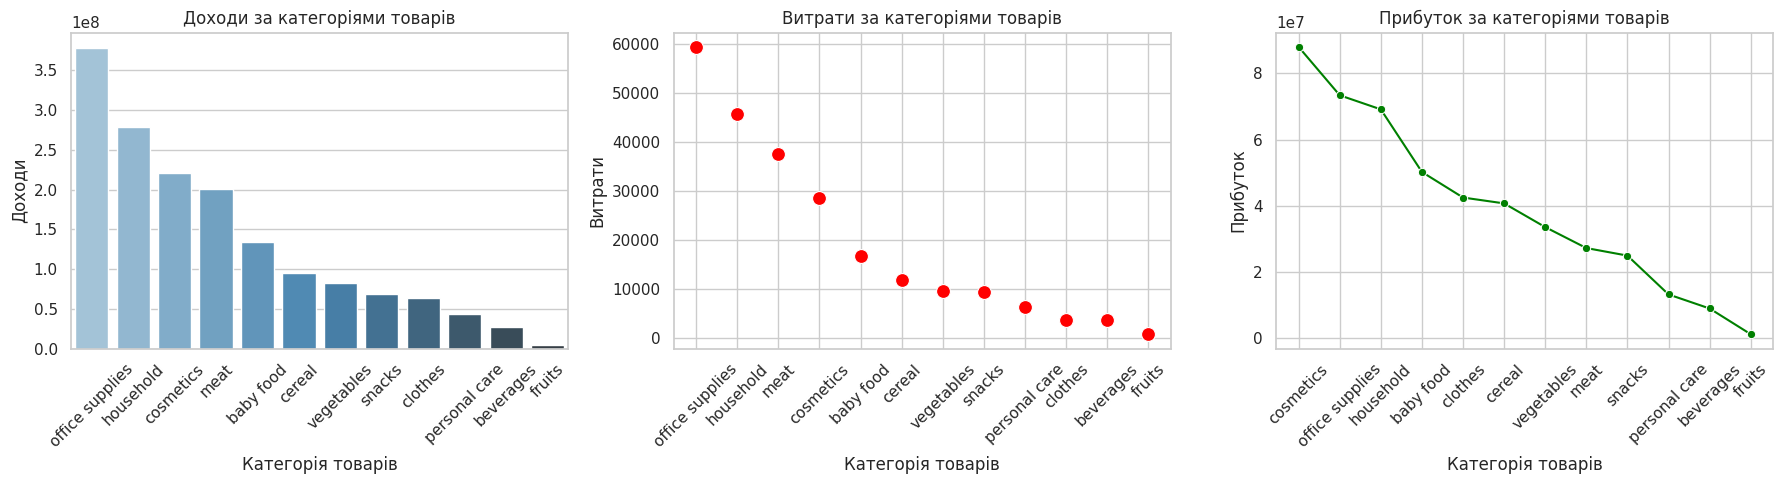

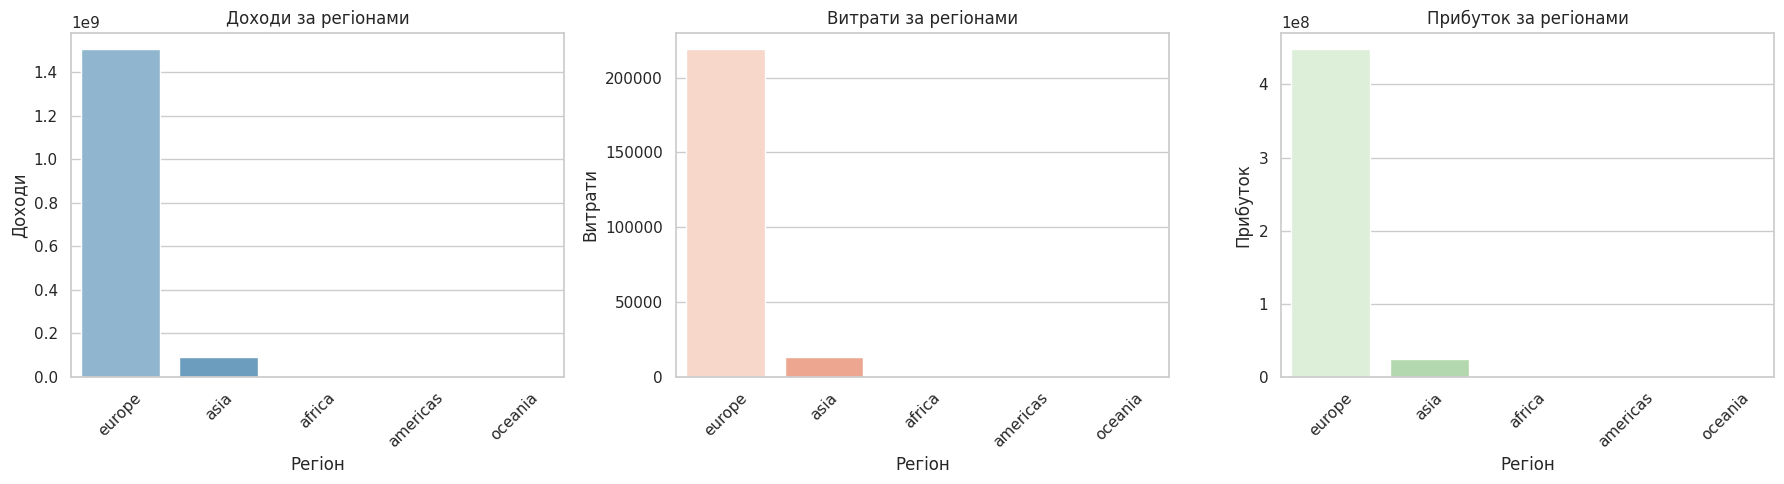

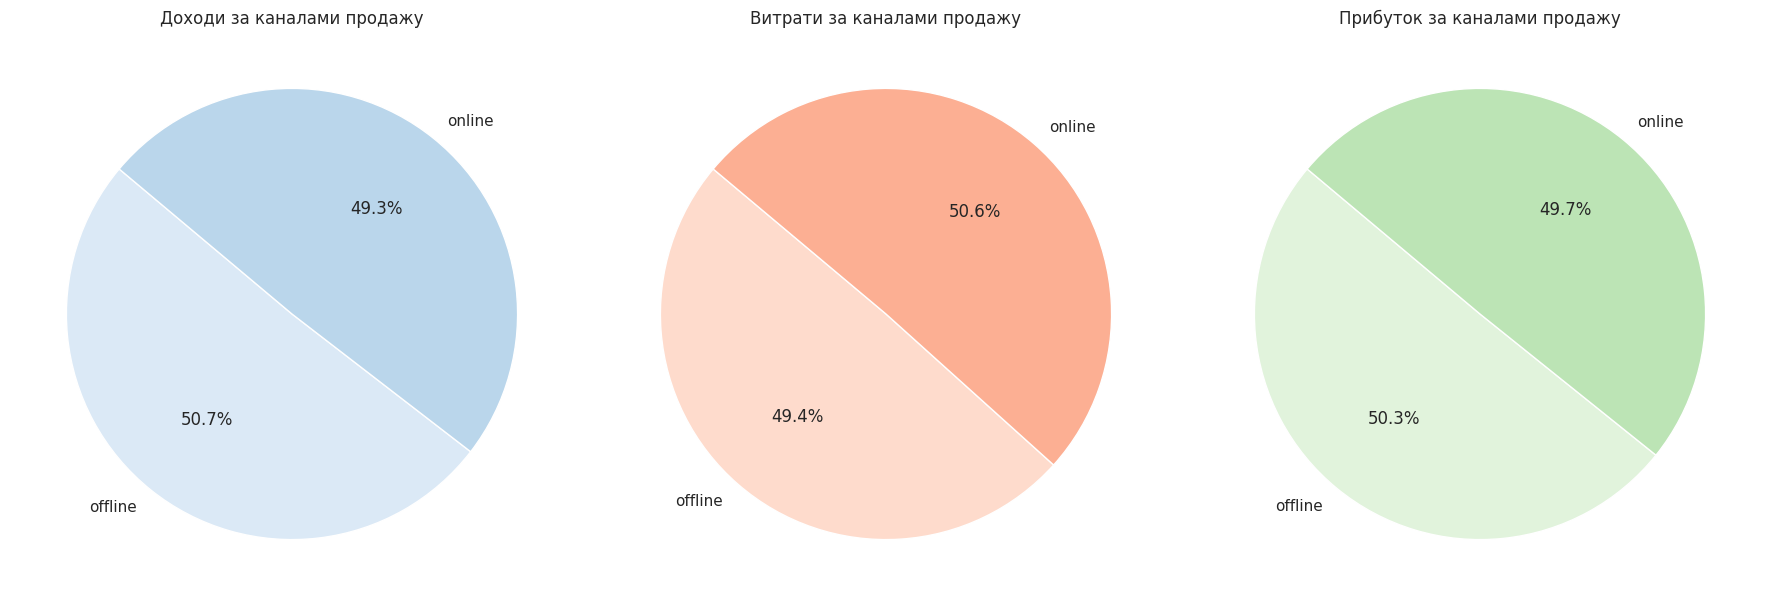

In [ ]:
category_summary = df.groupby('item_type').agg({'Revenue': 'sum', 'Unit Cost': 'sum', 'Profit': 'sum'}).reset_index()
print(category_summary)
region_summary = df.groupby('region').agg({'Revenue': 'sum', 'Unit Cost': 'sum', 'Profit': 'sum'}).reset_index()
print(region_summary)
channel_summary = df.groupby('Sales Channel').agg({'Revenue': 'sum', 'Unit Cost': 'sum', 'Profit': 'sum'}).reset_index()
print(channel_summary)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(ax=axes[0], data=category_summary.sort_values('Revenue', ascending=False), x='item_type', y='Revenue', hue='item_type', palette='Blues_d', legend=False)
axes[0].set_title('Доходи за категоріями товарів')
axes[0].set_xlabel('Категорія товарів')
axes[0].set_ylabel('Доходи')
axes[0].tick_params(axis='x', rotation=45)
sns.scatterplot(ax=axes[1], data=category_summary.sort_values('Unit Cost', ascending=False), x='item_type', y='Unit Cost', color='red', s=100)
axes[1].set_title('Витрати за категоріями товарів')
axes[1].set_xlabel('Категорія товарів')
axes[1].set_ylabel('Витрати')
axes[1].tick_params(axis='x', rotation=45)
sns.lineplot(ax=axes[2], data=category_summary.sort_values('Profit', ascending=False), x='item_type', y='Profit', marker='o', color='green')
axes[2].set_title('Прибуток за категоріями товарів')
axes[2].set_xlabel('Категорія товарів')
axes[2].set_ylabel('Прибуток')
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(ax=axes[0], data=region_summary.sort_values('Revenue', ascending=False), x='region', y='Revenue', hue='region', palette='Blues_d', legend=False)
axes[0].set_title('Доходи за регіонами')
axes[0].set_xlabel('Регіон')
axes[0].set_ylabel('Доходи')
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(ax=axes[1], data=region_summary.sort_values('Unit Cost', ascending=False), x='region', y='Unit Cost', hue='region', palette='Reds', legend=False)
axes[1].set_title('Витрати за регіонами')
axes[1].set_xlabel('Регіон')
axes[1].set_ylabel('Витрати')
axes[1].tick_params(axis='x', rotation=45)
sns.barplot(ax=axes[2], data=region_summary.sort_values('Profit', ascending=False), x='region', y='Profit', hue='region', palette='Greens', legend=False)
axes[2].set_title('Прибуток за регіонами')
axes[2].set_xlabel('Регіон')
axes[2].set_ylabel('Прибуток')
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].pie(channel_summary['Revenue'], labels=channel_summary['Sales Channel'], autopct='%1.1f%%', colors=sns.color_palette('Blues'), startangle=140)
axes[0].set_title('Доходи за каналами продажу')
axes[1].pie(channel_summary['Unit Cost'], labels=channel_summary['Sales Channel'], autopct='%1.1f%%', colors=sns.color_palette('Reds'), startangle=140)
axes[1].set_title('Витрати за каналами продажу')
axes[2].pie(channel_summary['Profit'], labels=channel_summary['Sales Channel'], autopct='%1.1f%%', colors=sns.color_palette('Greens'), startangle=140)
axes[2].set_title('Прибуток за каналами продажу')
plt.tight_layout()
plt.show()

**Загальний дохід, витрати та прибуток за категоріями товарів**

Дохід: Категорії Household, Office Supplies та Cereal генерують найбільший дохід. Витрати: Найвищі витрати також припадають на категорії з найбільшим доходом, що є очікуваним. Прибуток: Категорії Household та Office Supplies є лідерами за прибутком. Це означає, що вони не лише добре продаються, але й мають високу маржу.
Аутсайдери: Категорії Snacks та Beverages мають найменші показники доходу та прибутку. Варто звернути увагу на ці категорії. Можливо, вони не є рентабільними через низький попит, високу конкуренцію або високі операційні витрати. Тому варто прийняти рішення або про відмову від даних товарів, або про більші інвестиції в них.

**Загальний дохід, витрати та прибуток за регіонами**
Загальний дохід, витрати і прибуток, очікувано взаємозалежні, у розрізі регіонів Europe є безумовним лідером, генеруючи значно більше доходу і прибутку порівняно з іншими, але має і вищі витрати.
 Asia має нижчі показники доходу та прибутку. Це може вказувати на необхідність інвестування в маркетинг або розширення бізнесу в цьому регіоні.

**Загальний дохід, витрати та прибуток за каналом продажів**

Offline-продажі є основним джерелом доходу і прибутку. Компанія значною мірою залежить від фізичних продажів. Хоча онлайн-канал також є важливим і виходячи з більших витрат саме на онлайн-канали - компаня обрала стратегію розширення та оптимізації онлайн-продажів.

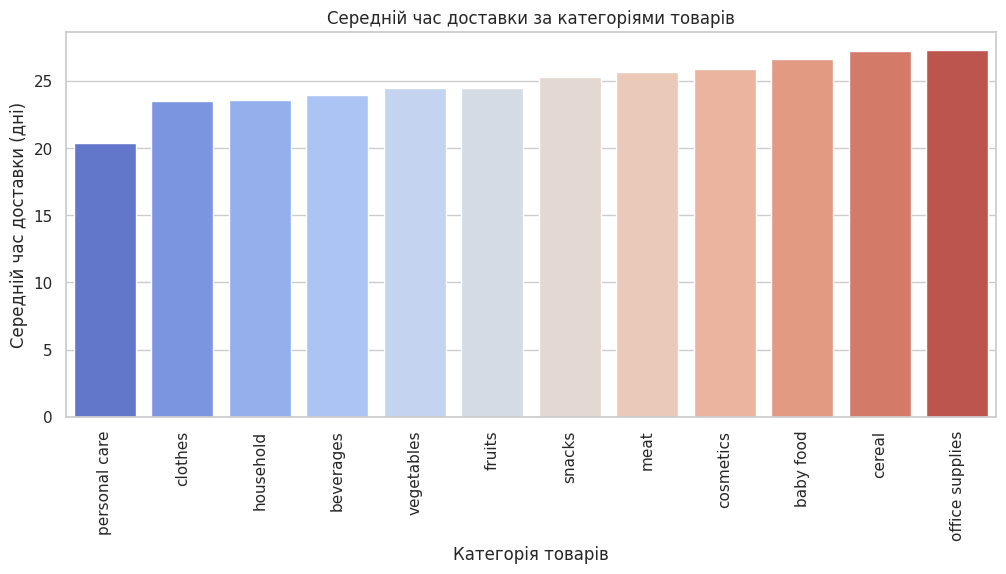

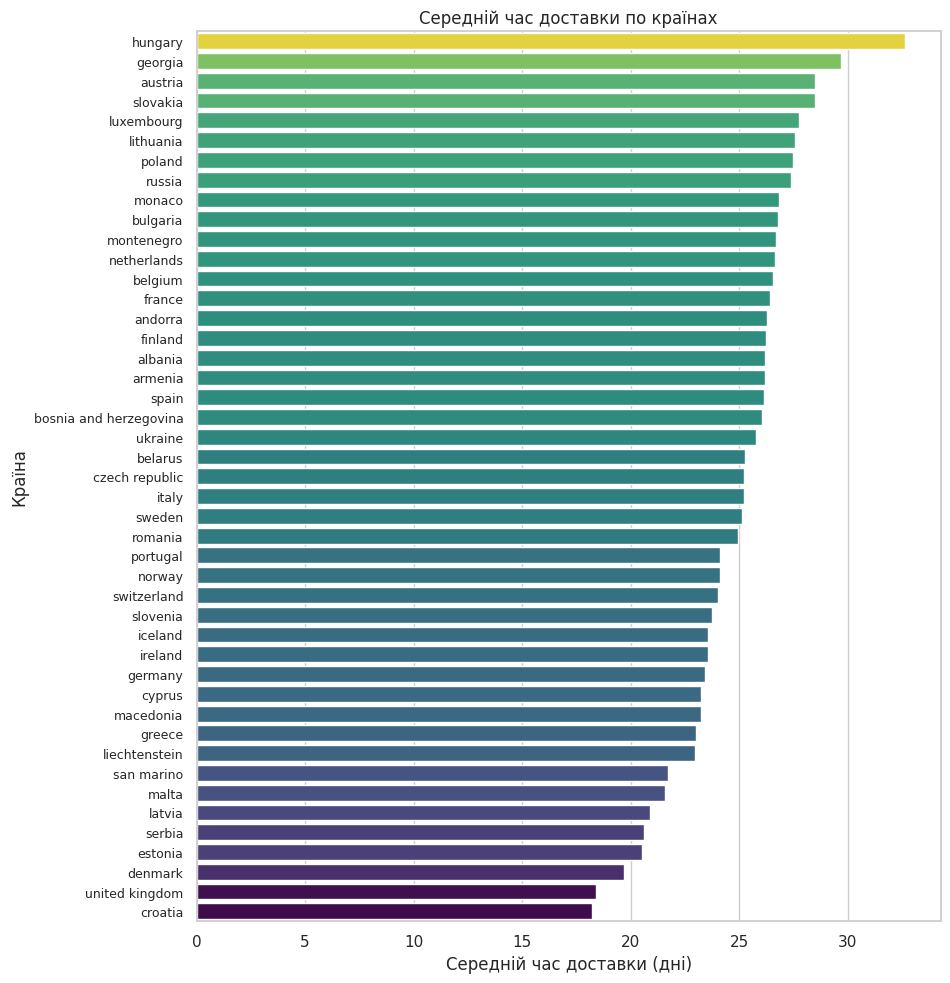

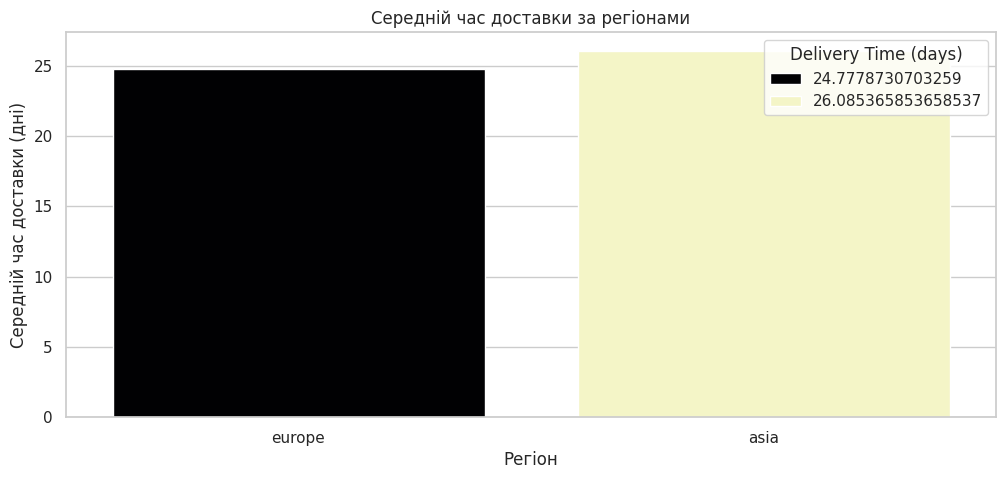

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Delivery Time (days)'] = (df['Ship Date'] - df['Order Date']).dt.days


avg_delivery_category = df.groupby('item_type')['Delivery Time (days)'].mean().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=avg_delivery_category.sort_values('Delivery Time (days)'), x='item_type', y='Delivery Time (days)', hue='item_type', palette='coolwarm', legend=False)
plt.title('Середній час доставки за категоріями товарів')
plt.xlabel('Категорія товарів')
plt.ylabel('Середній час доставки (дні)')
plt.xticks(rotation=90)
plt.show()

avg_delivery_country = df.groupby('name')['Delivery Time (days)'].mean().reset_index()
avg_delivery_country = avg_delivery_country[avg_delivery_country['Delivery Time (days)'].notna()]
top_countries = avg_delivery_country.sort_values('Delivery Time (days)', ascending=False)
plt.figure(figsize=(10, 10))
sns.barplot(x='Delivery Time (days)', y='name', data=top_countries, hue='Delivery Time (days)', palette='viridis', legend=False)
plt.title('Середній час доставки по країнах')
plt.xlabel('Середній час доставки (дні)')
plt.ylabel('Країна')
plt.tight_layout()
plt.yticks(fontsize=9)
plt.show()

avg_delivery_region = df.groupby('region')['Delivery Time (days)'].mean().reset_index()
filtered_region = avg_delivery_region[(avg_delivery_region['Delivery Time (days)'].notna()) & (avg_delivery_region['Delivery Time (days)'] != 0)]
plt.figure(figsize=(12,5))
sns.barplot(data=filtered_region.sort_values('Delivery Time (days)'), x='region', y='Delivery Time (days)', hue='Delivery Time (days)', palette='magma')
plt.title('Середній час доставки за регіонами')
plt.xlabel('Регіон')
plt.ylabel('Середній час доставки (дні)')
plt.show()

**Середній час доставки в розрізі категорій товарів, країн, регіонів.**

На графіку  "Середній час доставки за категоріями товарів" можна помітити, що найшвидше доставляються товари з категорії Personal Care - 20 днів, а найдовше Office Supplies - 25 днів. Всі інші категорії доставляють в термін від 20 до 25 днів, що може бути не дуже зручно у разі покупки товарів що швидко псуються (meat, vegetables, fruits).

На графіку "Середній час доставки по країнах" можна побачити, що найдовше доставляються товари у Hungary 33 дні, а найшвидше у Croatia та United Kingdom.

Середній час доставки по регіонах показує, що доставка в Європі займає менше днів майже 25, а у Азії 26.


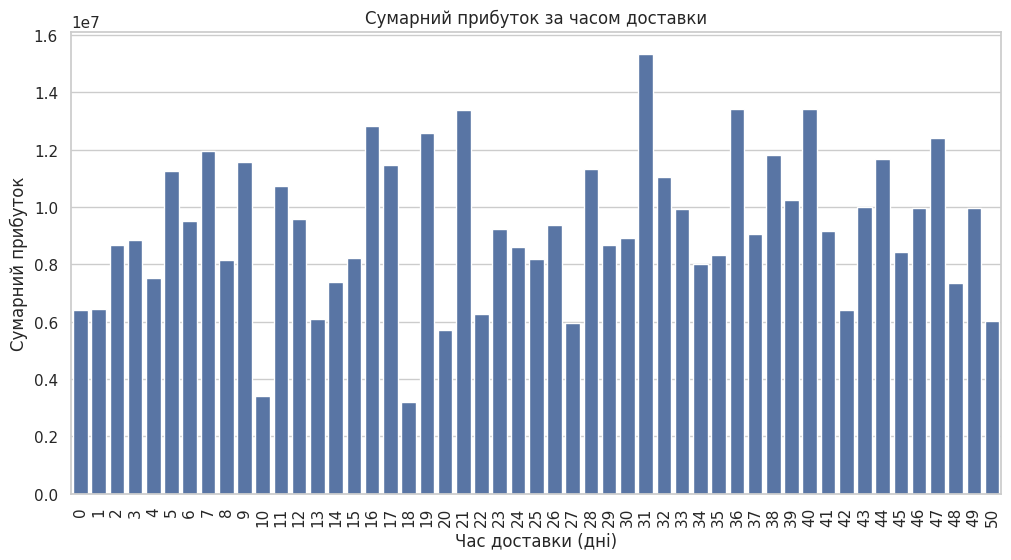

In [ ]:
df_filtered = df[df['Delivery Time (days)'].notna() & (df['Delivery Time (days)'] >= 0)]

agg_profit = df_filtered.groupby('Delivery Time (days)').agg(Total_Profit=('Profit', 'sum'), Count=('Profit', 'count')).reset_index()
agg_profit['Delivery Time (days)'] = agg_profit['Delivery Time (days)'].astype(int)
plt.figure(figsize=(12,6))
sns.barplot(data=agg_profit, x='Delivery Time (days)', y='Total_Profit')
plt.title('Сумарний прибуток за часом доставки')
plt.xlabel('Час доставки (дні)')
plt.ylabel('Сумарний прибуток')
plt.xticks(rotation=90)
plt.show()

Графік "Сумарний прибуток за часом доставки" показує, що прибуток не залежить від терміну доставки.

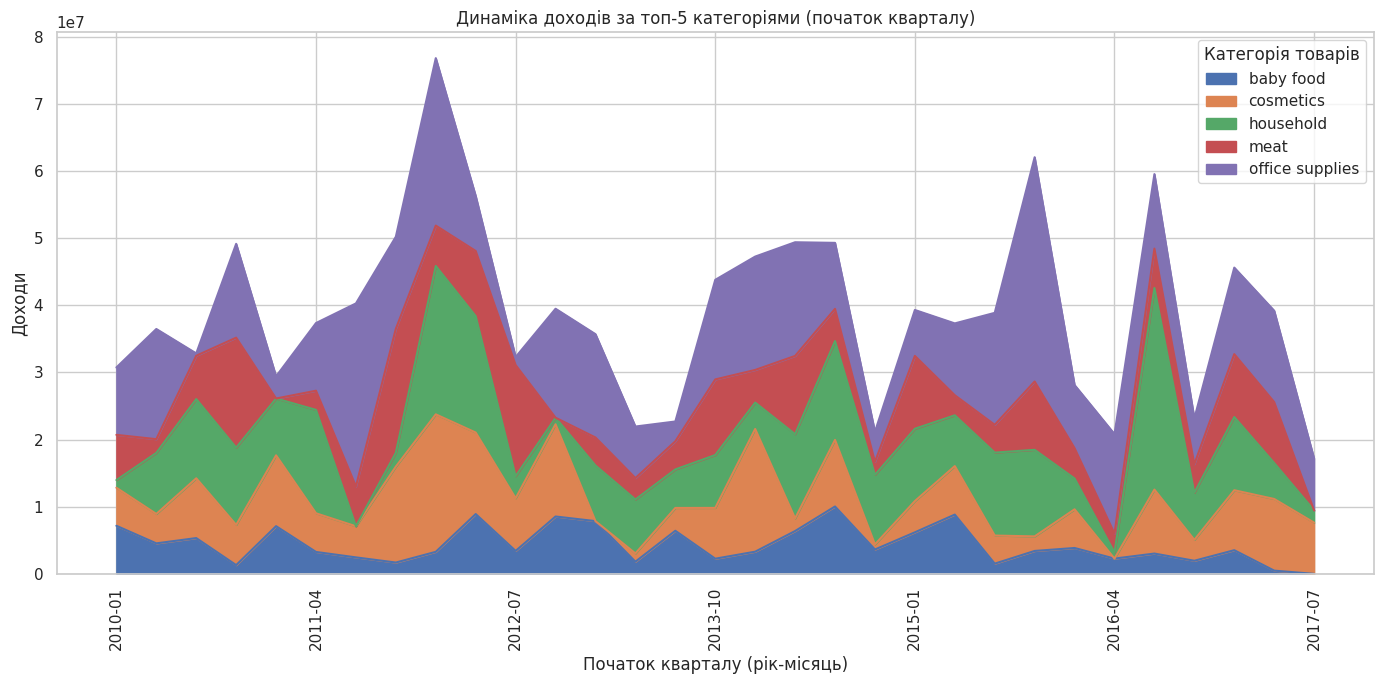

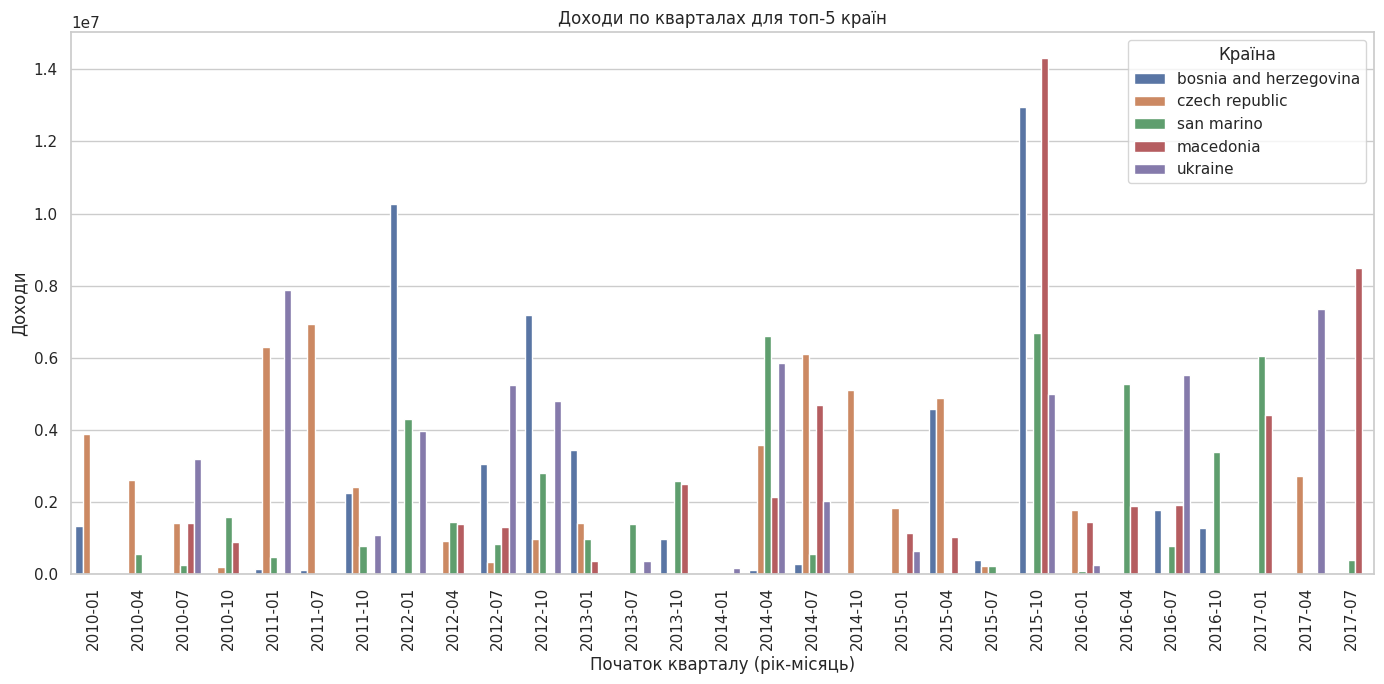

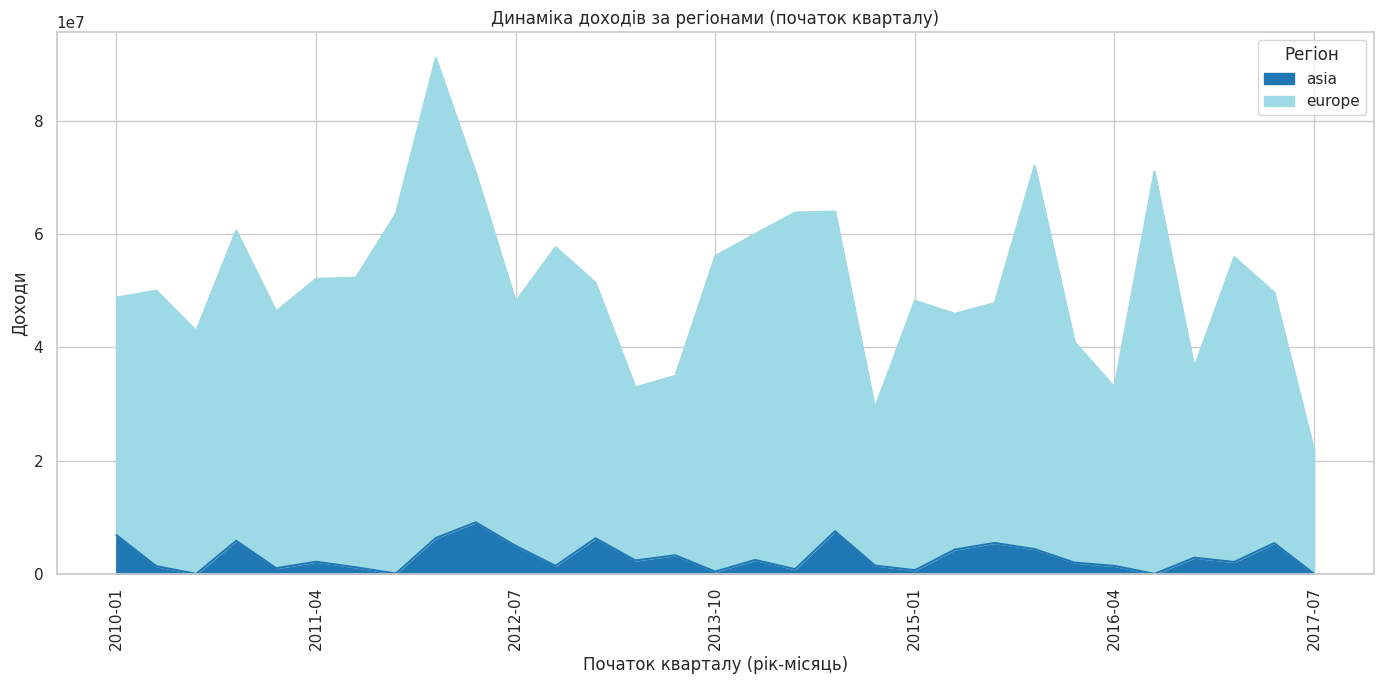

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Order Quarter Start'] = df['Order Date'].dt.to_period('Q').dt.start_time
df['Order Quarter Label'] = df['Order Quarter Start'].dt.strftime('%Y-%m')

total_revenue_by_category = df.groupby('item_type')['Revenue'].sum().sort_values(ascending=False)
top5_categories = total_revenue_by_category.head(5).index.tolist()

sales_category_top5 = df[df['item_type'].isin(top5_categories)].groupby(['Order Quarter Label', 'item_type'])['Revenue'].sum().reset_index()
sales_pivot_top5 = sales_category_top5.pivot(index='Order Quarter Label', columns='item_type', values='Revenue').fillna(0)

sales_pivot_top5.plot(kind='area', stacked=True, figsize=(14,7))
plt.title('Динаміка доходів за топ-5 категоріями (початок кварталу)')
plt.xlabel('Початок кварталу (рік-місяць)')
plt.ylabel('Доходи')
plt.xticks(rotation=90)
plt.legend(title='Категорія товарів')
plt.tight_layout()
plt.show()

top5_countries = df.groupby('name')['Revenue'].sum().nlargest(5).index
df_top5_countries = df[df['name'].isin(top5_countries)]
sales_quarterly_countries = df_top5_countries.groupby(['Order Quarter Label', 'name'])['Revenue'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=sales_quarterly_countries, x='Order Quarter Label', y='Revenue', hue='name')
plt.title('Доходи по кварталах для топ-5 країн')
plt.xlabel('Початок кварталу (рік-місяць)')
plt.ylabel('Доходи')
plt.xticks(rotation=90)
plt.legend(title='Країна')
plt.tight_layout()
plt.show()

sales_region = df.groupby(['Order Quarter Label', 'region'])['Revenue'].sum().reset_index()
sales_pivot_region = sales_region.pivot(index='Order Quarter Label', columns='region', values='Revenue').fillna(0)
sales_pivot_region.plot(kind='area', stacked=True, figsize=(14,7), colormap='tab20')
plt.title('Динаміка доходів за регіонами (початок кварталу)')
plt.xlabel('Початок кварталу (рік-місяць)')
plt.ylabel('Доходи')
plt.xticks(rotation=90)
plt.legend(title='Регіон')
plt.tight_layout()
plt.show()

**Динаміка доходів за топ-5 категоріями по кварталах** показує, що
категорія "office supplies" стабільно дає найбільший дохід серед топ-5 категорій — її площа на графіку найбільша й найбільш виражена в піках, у певні періоди (особливо на початку року та в середині року) спостерігаються різкі піки доходів у всіх категоріях, що може бути пов’язано з квартальними чи річними замовленнями, акціями або святами. Інші категорії мають більш рівномірні продажі, але теж демонструють сплески в ті самі періоди, що й канцтовари, тобто всі групи підпорядковуються загальній сезонній динаміці.

**Доходи по кварталах (для топ 5 країн)** показують, що великі коливання доходів у різні квартали (наприклад, 2012-01, 2015-10, 2016-01), що свідчить про сезонність або разові великі замовлення. Лідери за доходом у різні періоди змінюються: Bosnia and Herzegovina має найбільший одиночний пік у 2012-01. Ukraine  показує високі доходи на початку 2011 та у 2015–2016 рр. Macedonia  має значні піки в 2015-10 та 2017-07. San Marino і Czech Republic зазвичай приносять менше доходів порівняно з іншими, але все ж демонструють локальні зростання. Відсутність постійного лідера може означати, що ринок у цих країнах нестабільний або залежить від разових великих угод.

**Доходи за регіонами** свідчать, що Європа — основний драйвер доходів. Її внесок у виручку значно перевищує Азію протягом усього періоду спостережень.
Азія має стабільно невеликий обсяг доходів, без значних піків, і виглядає як другорядний ринок. Сезонність і коливання — для Європи чітко помітні хвилеподібні зміни доходів, з яскраво вираженими піками (2012-04, 2015-04, 2016-04), які співпадають з піками, що ми бачили на графіках по країнах і категоріях. Загалом немає сталого зростання чи падіння, але є короткі періоди різкого збільшення доходів, ймовірно, пов’язані з великими контрактами або сезонними факторами.

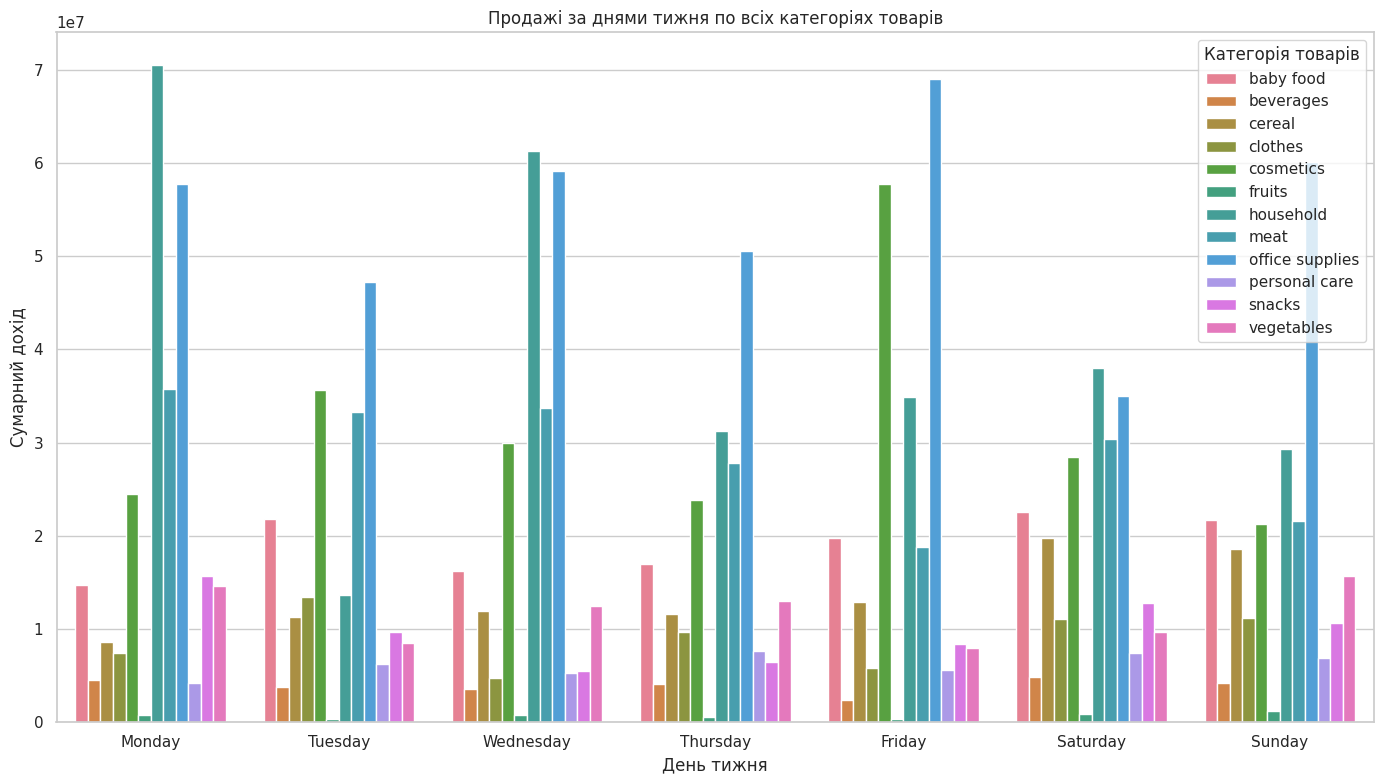

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Day of Week'] = df['Order Date'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=days_order, ordered=True)
sales_by_day = df.groupby(['item_type', 'Day of Week'], observed=True)['Revenue'].sum().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=sales_by_day, x='Day of Week', y='Revenue', hue='item_type', order=days_order)
plt.title('Продажі за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('Сумарний дохід')
plt.legend(title='Категорія товарів')
plt.tight_layout()
plt.show()

На графіку **"Продажі за днями тижня**" можна побачити, як змінюється загальний дохід протягом тижня. Наприклад, вівторок, четвер і п'ятниця мають найвищий загальний дохід, тоді як середа та субота – трохи нижчий. Неділя та понеділок мають найменший обсяг продажів. Також на графіку не спостургіається загальна сезонність для різних категорій.